In [4]:
#Exercise1
import pandas as pd
import datetime as dt
df = pd.read_csv('data.csv', encoding='latin-1')
#MODEL CHATGPT4

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Calculate Recency, Frequency, and Monetary values
today = df['InvoiceDate'].max()

# Recency: Calculate the number of days since the last purchase for each customer
recency_df = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency_df['Recency'] = (today - recency_df['InvoiceDate']).dt.days

# Frequency: Calculate the number of purchases made by each customer
frequency_df = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency_df.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)

# Monetary: Calculate the total monetary value spent by each customer
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
monetary_df = df.groupby('CustomerID')['TotalPrice'].sum().reset_index()
monetary_df.rename(columns={'TotalPrice': 'Monetary'}, inplace=True)

# Merge the Recency, Frequency, and Monetary dataframes
rfm_df = recency_df.merge(frequency_df, on='CustomerID')
rfm_df = rfm_df.merge(monetary_df, on='CustomerID')

# Now you have the RFM scores for each customer in the 'rfm_df' dataframe
# You can use these scores for customer segmentation and analysis
print(rfm_df.head())

   CustomerID         InvoiceDate  Recency  Frequency  Monetary
0     12346.0 2011-01-18 10:17:00      320          2      0.00
1     12347.0 2011-10-31 12:25:00       34          6   4085.18
2     12348.0 2011-09-25 13:13:00       70          4   1797.24
3     12349.0 2011-11-21 09:51:00       13          1   1757.55
4     12350.0 2011-02-02 16:01:00      304          1    334.40


In [5]:
# Define thresholds for Recency, Frequency, and Monetary values
recency_threshold = 90  # Customers who made a purchase within the last 90 days are considered recent
frequency_threshold = 3  # Customers who made at least 3 purchases are considered frequent
monetary_threshold = 1000  # Customers who spent at least $1000 are considered high-value

# Function to classify customers into segments
def segment_customer(row):
    if row['Recency'] <= recency_threshold and row['Frequency'] >= frequency_threshold and row['Monetary'] >= monetary_threshold:
        return 'High-Value and Loyal'
    elif row['Recency'] <= recency_threshold:
        return 'Recent'
    elif row['Frequency'] >= frequency_threshold:
        return 'Loyal'
    else:
        return 'New'

# Apply the segmentation function to the RFM dataframe
rfm_df['Segment'] = rfm_df.apply(segment_customer, axis=1)

# Now 'rfm_df' contains a 'Segment' column with customer segments
print(rfm_df.head())


   CustomerID         InvoiceDate  Recency  Frequency  Monetary  \
0     12346.0 2011-01-18 10:17:00      320          2      0.00   
1     12347.0 2011-10-31 12:25:00       34          6   4085.18   
2     12348.0 2011-09-25 13:13:00       70          4   1797.24   
3     12349.0 2011-11-21 09:51:00       13          1   1757.55   
4     12350.0 2011-02-02 16:01:00      304          1    334.40   

                Segment  
0                   New  
1  High-Value and Loyal  
2  High-Value and Loyal  
3                Recent  
4                   New  





1. The Selection of ChatGPT Model and RFM Analysis Quality:

The choice of a specific ChatGPT model can significantly impact the quality and accuracy of the RFM analysis in the following ways:

Quality of Responses:

Larger Models: Models like GPT-3.5 or successors tend to provide more accurate and coherent responses. They can understand and answer more complex questions related to data analysis and RFM calculation.
Fine-Tuning: If you have access to a fine-tuned model specifically designed for data analysis or customer segmentation, it may offer better performance than a generic language model.
Understanding of Context:

Contextual Understanding: More advanced models are better at understanding the context of your questions. They can provide more relevant and accurate information regarding RFM analysis.
Specific Knowledge: Specialized models may be trained on domain-specific data, which can be advantageous when dealing with industry-specific jargon or nuances.
Handling Complexity:

Complex Queries: If your RFM analysis involves complex statistical or mathematical calculations, a more powerful model can handle them more effectively. You can ask detailed questions to assist in intricate calculations.
Time and Cost:

Resource Intensiveness: Larger models may require more computational resources and time for responses. Consider the trade-off between model size and response time when conducting real-time RFM analysis.

2. Advantages of Using AI for Customer Segmentation:

Using AI for customer segmentation offers several advantages:

Efficiency:

Automation: AI can process large datasets and perform calculations quickly, saving time compared to manual segmentation.
Consistency: AI algorithms provide consistent results and eliminate human bias in the segmentation process.
Accuracy:

Data-Driven Insights: AI can uncover hidden patterns and correlations in the data that may be challenging for humans to identify, leading to more accurate segments.
Real-time Updates: AI models can continuously analyze data, ensuring that customer segments remain up-to-date and reflective of current behavior.

Exercise 2

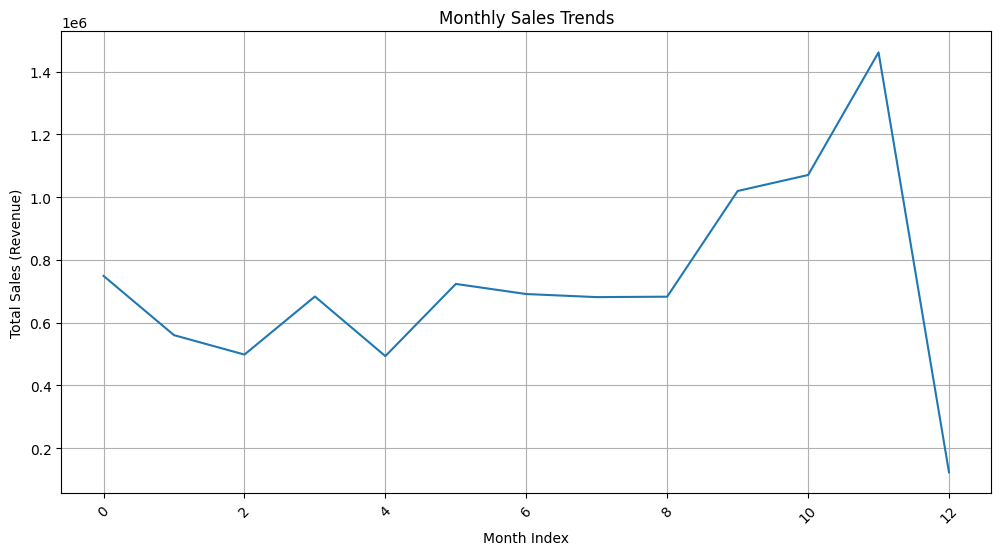

Sales Forecast for the Next Quarter:
13    1.167081e+06
14    7.048392e+05
15    9.093879e+05
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [10]:
#Exercise 3

import matplotlib.pyplot as plt
import statsmodels.api as sm


df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract month and year from 'InvoiceDate'
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

# Calculate monthly sales (revenue) by multiplying 'Quantity' and 'UnitPrice'
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Group by YearMonth and calculate total monthly revenue
monthly_sales = df.groupby('YearMonth')['Revenue'].sum()

# Convert 'YearMonth' to a numeric format for plotting
monthly_sales.index = range(len(monthly_sales))

# Plot the monthly sales data to visualize trends and seasonality
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values)
plt.title('Monthly Sales Trends')
plt.xlabel('Month Index')
plt.ylabel('Total Sales (Revenue)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Apply time series analysis for sales forecasting (e.g., using ARIMA model)
# You may need to install the statsmodels library if not already installed
# Install it using: pip install statsmodels

# Example: Fit an ARIMA model to the sales data and forecast for the next quarter
model = sm.tsa.ARIMA(monthly_sales, order=(1, 1, 1))
results = model.fit()
forecast = results.forecast(steps=3)  # Forecast for the next 3 months (1 quarter)

# Print the sales forecast for the next quarter
print("Sales Forecast for the Next Quarter:")
print(forecast)


Query Formulation: We can use ChatGPT to formulate queries and questions about our data analysis, as seen in the code examples.
In this case, ChatGPT provided insights about sales trends and seasonality. ChatGPT can help you generate relevant questions or queries to extract insights from your data.

Interpreting Analysis Output: ChatGPT can assist in interpreting the results of data analysis.

Discussion and Clarification: If you have questions or need clarification about the analysis or results, you can engage in a conversation with ChatGPT to gain a deeper understanding. ChatGPT can explain statistical concepts, provide context for the data, and assist in making sense of complex results.

Generating Insights and Recommendations: Beyond numerical results, ChatGPT can help generate insights and recommendations based on the data analysis. It can suggest strategies for improving sales, identifying trends, or addressing issues revealed in the analysis.
